In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("./dataset/crime_in_Vancouver.csv")
df.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude'],
      dtype='object')

In [9]:
df.NEIGHBOURHOOD.value_counts()

Central Business District    110947
West End                      41352
Fairview                      32161
Mount Pleasant                30536
Grandview-Woodland            27180
Renfrew-Collingwood           26761
Kitsilano                     26699
Kensington-Cedar Cottage      24941
Strathcona                    20919
Hastings-Sunrise              18126
Sunset                        17396
Marpole                       13083
Riley Park                    12521
Victoria-Fraserview           10819
Killarney                     10475
Oakridge                       8037
Dunbar-Southlands              7746
Kerrisdale                     7447
Arbutus Ridge                  6066
West Point Grey                5871
Shaughnessy                    5426
South Cambie                   5212
Stanley Park                   3775
Musqueam                        532
Name: NEIGHBOURHOOD, dtype: int64

In [10]:
df.TYPE.value_counts()

Theft from Vehicle                                        172700
Mischief                                                   70413
Break and Enter Residential/Other                          60862
Offence Against a Person                                   54142
Other Theft                                                52167
Theft of Vehicle                                           38418
Break and Enter Commercial                                 33845
Theft of Bicycle                                           25730
Vehicle Collision or Pedestrian Struck (with Injury)       21901
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Homicide                                                     220
Name: TYPE, dtype: int64

In [62]:
dropped_df = df[((df.TYPE == "Theft of Vehicle") | (df.TYPE == "Theft of Bicycle"))]
dropped_df

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
2615,Theft of Vehicle,2003,5,29,16.0,57.0,JERVIS ST / ROBSON ST,West End,490652.62,5459369.11,49.287001,-123.128537
2616,Theft of Vehicle,2003,5,3,0.0,0.0,JERVIS ST / ROBSON ST,West End,490652.62,5459369.11,49.287001,-123.128537
4138,Theft of Vehicle,2003,10,8,7.0,30.0,X W 49TH AVE,Oakridge,492280.46,5452561.67,49.225790,-123.106021
4139,Theft of Vehicle,2003,7,19,15.0,45.0,X TERRY FOX WAY,Central Business District,491800.42,5458033.24,49.275002,-123.112726
4140,Theft of Vehicle,2003,12,30,23.0,0.0,X SLOCAN ST,Hastings-Sunrise,496408.50,5459109.84,49.284730,-123.049385
...,...,...,...,...,...,...,...,...,...,...,...,...
530627,Theft of Vehicle,2017,1,11,22.0,0.0,65XX FLEMING ST,Victoria-Fraserview,494677.29,5452488.82,49.225160,-123.073102
530631,Theft of Bicycle,2017,4,22,8.0,0.0,2XX E 51ST AVE,Sunset,492640.70,5452337.20,49.223775,-123.101069
530634,Theft of Bicycle,2017,4,25,23.0,0.0,30XX W 12TH AVE,Kitsilano,487425.13,5456540.48,49.261500,-123.172830
530639,Theft of Bicycle,2017,3,15,17.0,0.0,21XX BRIAR AVE,Arbutus Ridge,488807.63,5455224.36,49.249688,-123.153792


In [63]:
dropped_df.TYPE = dropped_df.TYPE.map({"Theft of Vehicle": 0, "Theft of Bicycle": 1})
dropped_df

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_16944\2046696562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df.TYPE = dropped_df.TYPE.map({"Theft of Vehicle": 0, "Theft of Bicycle": 1})


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
2615,0,2003,5,29,16.0,57.0,JERVIS ST / ROBSON ST,West End,490652.62,5459369.11,49.287001,-123.128537
2616,0,2003,5,3,0.0,0.0,JERVIS ST / ROBSON ST,West End,490652.62,5459369.11,49.287001,-123.128537
4138,0,2003,10,8,7.0,30.0,X W 49TH AVE,Oakridge,492280.46,5452561.67,49.225790,-123.106021
4139,0,2003,7,19,15.0,45.0,X TERRY FOX WAY,Central Business District,491800.42,5458033.24,49.275002,-123.112726
4140,0,2003,12,30,23.0,0.0,X SLOCAN ST,Hastings-Sunrise,496408.50,5459109.84,49.284730,-123.049385
...,...,...,...,...,...,...,...,...,...,...,...,...
530627,0,2017,1,11,22.0,0.0,65XX FLEMING ST,Victoria-Fraserview,494677.29,5452488.82,49.225160,-123.073102
530631,1,2017,4,22,8.0,0.0,2XX E 51ST AVE,Sunset,492640.70,5452337.20,49.223775,-123.101069
530634,1,2017,4,25,23.0,0.0,30XX W 12TH AVE,Kitsilano,487425.13,5456540.48,49.261500,-123.172830
530639,1,2017,3,15,17.0,0.0,21XX BRIAR AVE,Arbutus Ridge,488807.63,5455224.36,49.249688,-123.153792


In [64]:
dropped_df.TYPE.value_counts()

0    38418
1    25730
Name: TYPE, dtype: int64

In [65]:
new_df = dropped_df[["TYPE", "NEIGHBOURHOOD"]]
new_df

,TYPE,NEIGHBOURHOOD
2615,0,West End
2616,0,West End
4138,0,Oakridge
4139,0,Central Business District
4140,0,Hastings-Sunrise
...,...,...
530627,0,Victoria-Fraserview
530631,1,Sunset
530634,1,Kitsilano
530639,1,Arbutus Ridge


In [75]:
separated_cols = pd.get_dummies(new_df.TYPE.explode()).groupby(level=0).sum()
separated_cols.rename(columns = { 0: "Theft of Vehicle", 1: "Theft of Bicycle" }, inplace = True)
separated_cols

,Theft of Vehicle,Theft of Bicycle
2615,1,0
2616,1,0
4138,1,0
4139,1,0
4140,1,0
...,...,...
530627,1,0
530631,0,1
530634,0,1
530639,0,1


In [79]:
# new_df = new_df.drop(["TYPE"], axis=1)
new_df["Theft of Vehicle"] = separated_cols["Theft of Vehicle"]
new_df["Theft of Bicycle"] = separated_cols["Theft of Bicycle"]
new_df

,NEIGHBOURHOOD,Theft of Vehicle,Theft of Bicycle
2615,West End,1,0
2616,West End,1,0
4138,Oakridge,1,0
4139,Central Business District,1,0
4140,Hastings-Sunrise,1,0
...,...,...,...
530627,Victoria-Fraserview,1,0
530631,Sunset,0,1
530634,Kitsilano,0,1
530639,Arbutus Ridge,0,1


In [82]:
new_df = new_df.groupby("NEIGHBOURHOOD", as_index=False).sum()
new_df

,NEIGHBOURHOOD,Theft of Vehicle,Theft of Bicycle
0,Arbutus Ridge,498.0,160.0
1,Central Business District,4016.0,6907.0
2,Dunbar-Southlands,629.0,240.0
3,Fairview,2037.0,3394.0
4,Grandview-Woodland,3111.0,1403.0
5,Hastings-Sunrise,2452.0,321.0
6,Kensington-Cedar Cottage,2919.0,859.0
7,Kerrisdale,547.0,179.0
8,Killarney,1302.0,163.0
9,Kitsilano,2366.0,2464.0


In [88]:
# removing outlier
newer_df = new_df[(new_df.NEIGHBOURHOOD != "Central Business District")]
newer_df

,NEIGHBOURHOOD,Theft of Vehicle,Theft of Bicycle
0,Arbutus Ridge,498.0,160.0
2,Dunbar-Southlands,629.0,240.0
3,Fairview,2037.0,3394.0
4,Grandview-Woodland,3111.0,1403.0
5,Hastings-Sunrise,2452.0,321.0
6,Kensington-Cedar Cottage,2919.0,859.0
7,Kerrisdale,547.0,179.0
8,Killarney,1302.0,163.0
9,Kitsilano,2366.0,2464.0
10,Marpole,1617.0,232.0


In [121]:
newer_df.to_csv("./dataset/cluster_data.csv", index=False)

In [114]:
x1 = np.array(newer_df["Theft of Vehicle"])
x2 = np.array(newer_df["Theft of Bicycle"])
x = np.array(list(zip(x1, x2)))
x

array([[ 498.,  160.],
       [ 629.,  240.],
       [2037., 3394.],
       [3111., 1403.],
       [2452.,  321.],
       [2919.,  859.],
       [ 547.,  179.],
       [1302.,  163.],
       [2366., 2464.],
       [1617.,  232.],
       [2654., 2746.],
       [  40.,    7.],
       [ 669.,  172.],
       [3011.,  419.],
       [1197.,  621.],
       [ 371.,  139.],
       [ 435.,  221.],
       [  74.,  214.],
       [1650., 1015.],
       [2275.,  255.],
       [1372.,  132.],
       [2660., 2985.],
       [ 450.,  372.]])

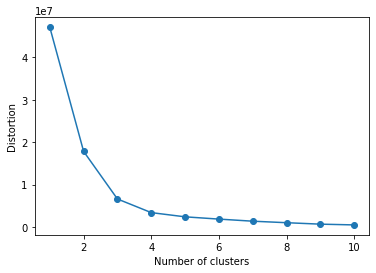

In [100]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [101]:
kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(x)

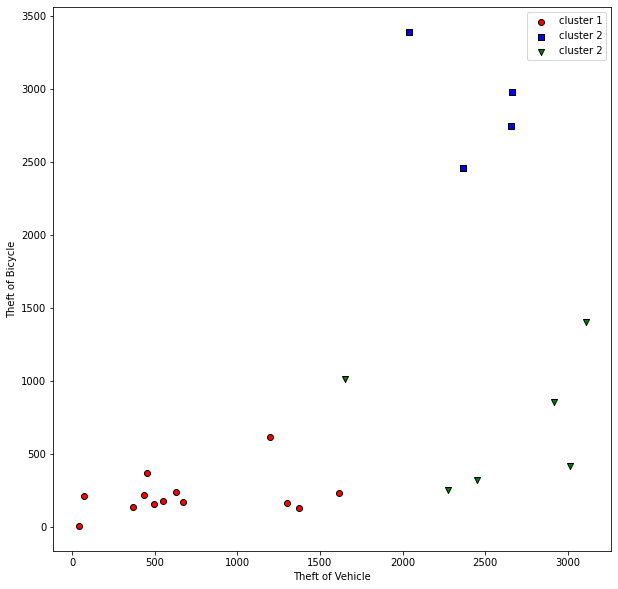

In [111]:
plt.scatter(
    x[predict == 0, 0], x[predict == 0, 1],
    c='red', marker='o', edgecolor='black', label='cluster 1'
)

plt.scatter(
    x[predict == 1, 0], x[predict == 1, 1],
    c='blue', marker='s', edgecolor='black', label='cluster 2'
)

plt.scatter(
    x[predict == 2, 0], x[predict == 2, 1],
    c='green', marker='v', edgecolor='black', label='cluster 2'
)

# plt.scatter(
#     km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
#     marker='*',
#     c='pink', edgecolor='black',
#     label='centroids'
# )

plt.legend(scatterpoints=1)
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Theft of Vehicle")
plt.ylabel("Theft of Bicycle")
plt.show()

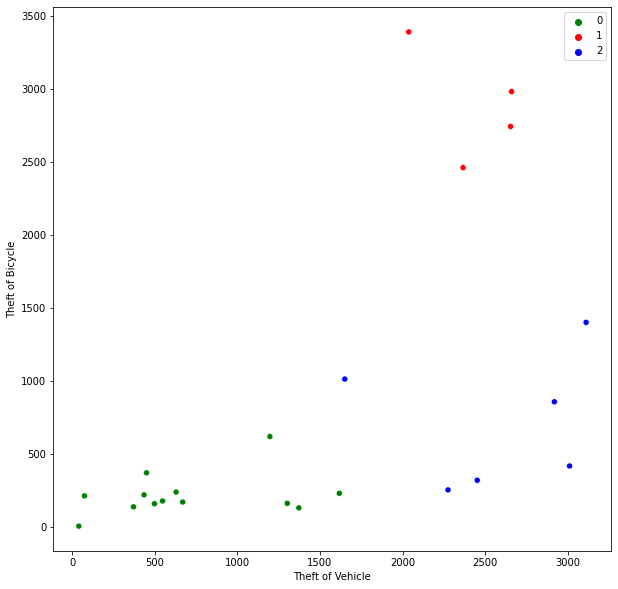

In [119]:
data_labels = kmeans.labels_
data = pd.DataFrame(x, columns=["Theft of Vehicle", "Theft of Bicycle"])

sns.scatterplot(
    x="Theft of Vehicle",
    y="Theft of Bicycle",
    data=data,
    hue=data_labels,
    palette=["green", "red", "blue"]
)
plt.show()